# Implementación de un Clasificador Perceptron

Basado en la implementación de Sebastian Raschka en el libro "Python Machine Learning".

 

*   __init__: Define la tasa de aprendizaje del algoritmo y el numero de pasadas a hacer por el set de datos.
*   fit: Implementa la regla de aprendizaje, definiendo inicialmente los pesos en 0 y luego ajustándolos a medida que calcula/predice el valor para cada fila del dataset.
*   predict: Es la función escalón ϕ(z). Si el valor de z es mayor igual a 0,
tiene por valor 1. En cualquier otro caso su valor es -1.
*   net_input: Es la implementación de la función de activación z. Si se fijan en el código, hace producto punto en los vectores x y w.

In [1]:
import numpy as np

class Perceptron:
    """Clasificador Perceptron basado en la descripción del libro
    "Python Machine Learning" de Sebastian Raschka.

    Parametros
    ----------

    eta: float
        Tasa de aprendizaje.
    n_iter: int
        Pasadas sobre el dataset.

    Atributos
    ---------
    w_: array de una dimensión
        Pesos actualizados después del ajuste
    errors_: list
        Cantidad de errores de clasificación en cada pasada

    """
    # Define la tasa de aprendizaje del algoritmo y el numero de pasadas a hacer por el conjunto de datos
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    #Implementa la regla de aprendizaje, definiendo inicialmente los pesos en 0 y luego ajustándolos a medida que calcula/predice el valor para cada fila del dataset
    def fit(self, X, y):
        """Ajustar datos de entrenamiento

        Parámetros
        ----------
        X:  array de forma = [n_samples, n_features]
            Vectores de entrenamiento donde n_samples es el número de muestras y
            n_features es el número de carácteristicas de cada muestra.
            Contendrá dos características largo sepal y el largo del pétalo
        y:  array de forma, forma = [n_samples].
            Valores de destino

        Returns
        -------
        self:   object
        """
        #  Creación de arreglos e inicialización en ceros
        self.w_ = np.zeros(1 + X.shape[1])  # contiene las 2 caracteristicas 
        print(self.w_.shape)
        self.errors_ = []
        for _ in range(self.n_iter): #Epocas
            errors = 0  #Recorre cada elemento de la lista  de los patrones
            for xi, target in zip(X, y): # Zip fusiona dos listas (caracteristicas y tipo)--- target contiene los resultados
                #print("Targ", target)
                update = self.eta * (target - self.predict(xi)) #incremento
                #print("update",update)
                #print("W",self.w_[1:])
                
                self.w_[1:] += update * xi #Pesos actuales (incremento X las entradas)--ajuste
                self.w_[0] += update  #incremento
                #print("incremento",self.w_[0])
                errors += int(update != 0.0)# Hace un cast ya que devuelve un valor boleano
            self.errors_.append(errors)
        return self #devuelve nuestro modelo después de que haya pasado n_iter veces a través de nuestro conjunto de datos de entrenamiento

#Es la función escalón ϕ(z). Si el valor de z es mayor igual a 0, tiene por valor 1. En cualquier otro caso su valor es -1.
    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi
#Es la implementación de la función de activación z. Si se fijan en el código, hace producto punto en los vectores x y w.
    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

In [2]:
import pandas as pd
#importaremos el dataset. En este caso usaremos Iris, que contiene información de flores (largo de pétalo, sépalo, especie, etc.)
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Para este ejemplo, vamos a trabajar con las setosas y las versicolor. No nos preocupamos por las virginicas porque ese tipo va de la fila 101-150 y nosotros solo seleccionamos las primeras 100.

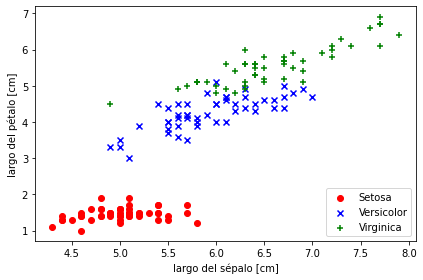

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

X_all = df.iloc[:,[0,2]].values #localiza los elementos en el data frame

plt.scatter(X_all[:50, 0], X_all[:50, 1], color='red', marker='o', label='Setosa') #grafica de dispersión
plt.scatter(X_all[50:100, 0], X_all[50:100, 1], color='blue', marker='x', label='Versicolor') 
plt.scatter(X_all[100:150, 0], X_all[100:150, 1], color='green', marker='+', label='Virginica')

plt.xlabel('largo del sépalo [cm]')
plt.ylabel('largo del pétalo [cm]')
plt.legend(loc='lower right') #posiciona las leyendas 

plt.tight_layout() #ajusta automáticamente los parámetros de la subparcela para que la(s) subparcela(s) encaje(n) en el área de la figura.
#plt.savefig('../images/iris_dataset_alltypes.png', dpi=300)
plt.show()

Si se fijan, las flores Virgínicas no son linealmente separables con las Versicolor solo usando el largo del sépalo y el largo del pétalo. Sin embargo, esando estas mismas carácterísticas, las Virgínicas y las Versicolor son separables de las Setosas.

En el siguiente gráfico solo veremos las Versicolor y las Setosas.

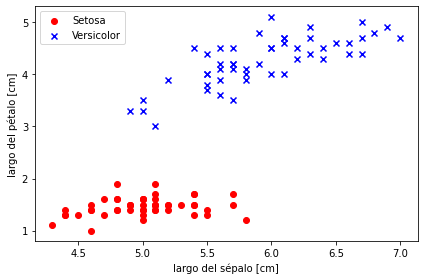

In [5]:
# extraemos el largo sepal y el largo del pétalo en las columnas 0 y 2. Usaremos solo Setosa y Versicolor
X = df.iloc[0:100, [0, 2]].values #localiza los elementos en el data frame

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('largo del sépalo [cm]')
plt.ylabel('largo del pétalo [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('../images/classifier-perceptron-setosa-versicolor.png', dpi=300)
plt.show()

(3,)


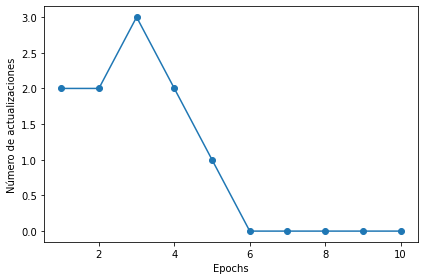

In [6]:
# selecccionar Setosa y Versicolor. 
y = df.iloc[0:100, 4].values # obtiene el texto de la especie 
#print (y)
y = np.where(y == 'Iris-setosa', -1, 1) #Cambia el texto, si es setosa pone -1 y si es versicolor pone 1
#print (y)
ppn = Perceptron(eta=0.1, n_iter=10)
#print(X)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
#plt.savefig('../images/perceptron_1.png', dpi=300)
plt.show()

Tomando esto, el modelo entrenado quedaría de la siguiente forma:

In [7]:
print("Theta: " + str(ppn.w_[0]))
print("W: " + str(ppn.w_[1:]))
print("X: [Largo sépalo, Largo pétalo]")
print("z = W · X")
print("phi(z) = 1 si z >= theta; -1 c.o.c")

Theta: -0.4
W: [-0.68  1.82]
X: [Largo sépalo, Largo pétalo]
z = W · X
phi(z) = 1 si z >= theta; -1 c.o.c


Ahora para mostrar cómo quedaría la recta que separa/clasifica cada dato...

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #configurar el generador de marcadores y el mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # obtiene los elementos unicos de la matriz, en esta caso son dos -1 y 1 

    # trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


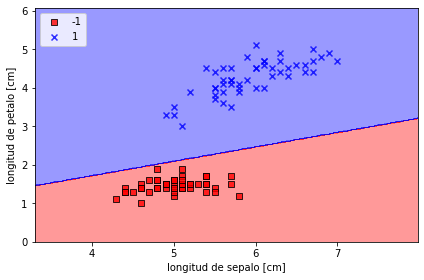

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('longitud de sepalo [cm]')
plt.ylabel('longitud de petalo [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('../images/perceptron_2.png', dpi=300)
plt.show()